In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%reload_ext autoreload
%autoreload 2

### Loading data

In [54]:
from datasets import get_dataset_split_names,load_dataset

path="Bena345/cdc-diabetes-health-indicators"

# To get how they split the data
split_names=get_dataset_split_names(path)
# Number train and test dataset
train_size=10000
test_size=5000

diabetes=load_dataset(path,split=[f'{split_names[0]}[:]', f'{split_names[1]}[:]'])
diabetes


[Dataset({
     features: ['ID', 'BMI', 'PhysHlth', 'Age', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'DiffWalk', 'Sex', 'Education', 'Income', 'Diabetes_binary'],
     num_rows: 194825
 }),
 Dataset({
     features: ['ID', 'BMI', 'PhysHlth', 'Age', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'DiffWalk', 'Sex', 'Education', 'Income', 'Diabetes_binary'],
     num_rows: 48707
 })]

### splitting data

In [55]:
diabetes_train_dataframe=diabetes[0].to_pandas()
diabetes_test_dataframe=diabetes[1].to_pandas()

In [56]:
diabetes_train_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194825 entries, 0 to 194824
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    194825 non-null  int64  
 1   BMI                   194825 non-null  float32
 2   PhysHlth              194825 non-null  float32
 3   Age                   194825 non-null  object 
 4   HighBP                194825 non-null  object 
 5   HighChol              194825 non-null  object 
 6   CholCheck             194825 non-null  object 
 7   Smoker                194825 non-null  object 
 8   Stroke                194825 non-null  object 
 9   HeartDiseaseorAttack  194825 non-null  object 
 10  PhysActivity          194825 non-null  object 
 11  Fruits                194825 non-null  object 
 12  Veggies               194825 non-null  object 
 13  HvyAlcoholConsump     194825 non-null  object 
 14  AnyHealthcare         194825 non-null  object 
 15  

In [57]:
diabetes_train_dataframe.head(5)

,ID,BMI,PhysHlth,Age,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,...,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,DiffWalk,Sex,Education,Income,Diabetes_binary
0,114414,29.0,0.0,65 to 69,0,1,1,0,0,0,...,0,1,1,Poor,0,0,0,6,7,Non-Diabetic
1,168896,32.0,0.0,80 or older,1,1,1,0,0,0,...,0,1,0,Poor,0,0,0,Some College Degree,4,Non-Diabetic
2,68354,25.0,5.0,65 to 69,1,0,1,1,0,0,...,0,1,0,Fair,0,0,1,6,2,Non-Diabetic
3,121194,24.0,0.0,80 or older,1,0,1,0,0,0,...,0,1,0,Very Good,0,1,0,Advanced Degree,5,Non-Diabetic
4,141150,31.0,0.0,25 to 29,0,0,1,0,0,1,...,0,1,0,Very Good,5,0,0,6,6,Diabetic


### Visualizing Age Data

In [58]:
diabetes_train_dataframe["Age"].describe()

count       194825
unique          13
top       60 to 64
freq         25608
Name: Age, dtype: object

In [59]:
age_count=diabetes_train_dataframe["Age"].value_counts().sort_index()

age_count

Age
18 to 24        4338
25 to 29        5843
30 to 34        8562
35 to 39       10586
40 to 44       12401
45 to 49       15228
50 to 54       20198
55 to 59       23610
60 to 64       25608
65 to 69       24767
70 to 74       18113
75 to 79       12284
80 or older    13287
Name: count, dtype: int64

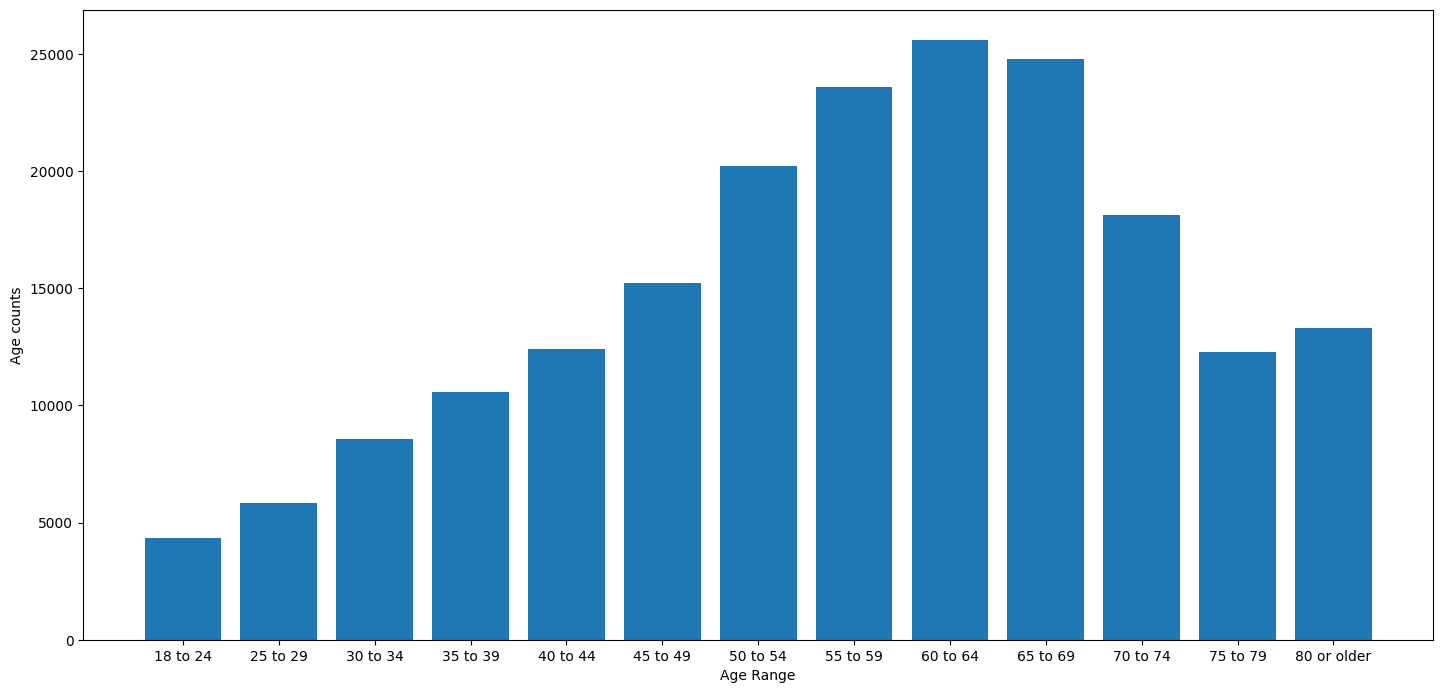

In [60]:
age_figer=plt.figure(figsize=(15,7),dpi=100)
age_axes=age_figer.add_axes([0.1,0.1,0.9,0.9])

age_axes.set_xlabel('Age Range')
age_axes.set_ylabel('Age counts')

age_axes.bar(age_count.index,age_count.values)

plt.show()

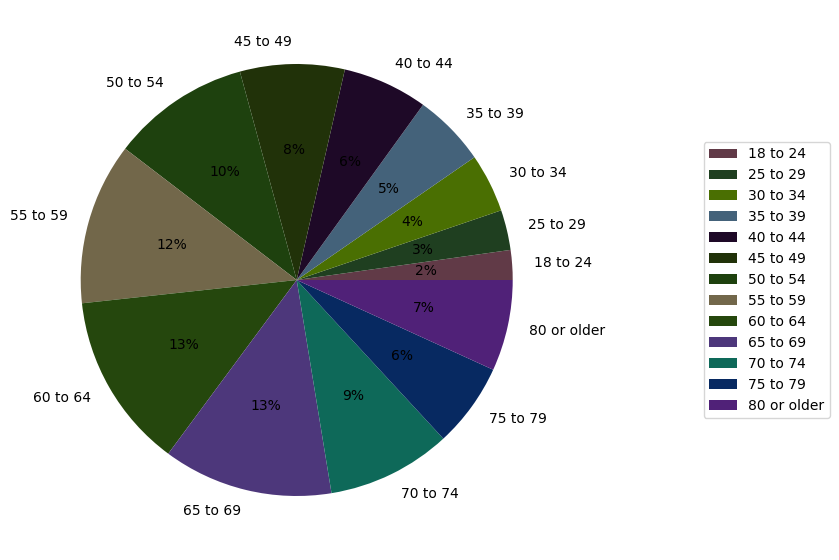

In [61]:
import random

age_figer=plt.figure(figsize=(10,6),dpi=100)
age_axes=age_figer.add_axes([0.1,0.1,0.9,0.9])

colors=[]
for i in range(age_count.size):
    rgb=(random.uniform(0,0.5),random.uniform(0,0.5),random.uniform(0,0.5))
    colors.append(rgb)

wedges, texts, autotexts=age_axes.pie(age_count.values,labels=age_count.index,
                                      colors=colors,autopct="%1.0f%%") #,textprops=dict(color="w")
plt.legend(wedges,age_count.index,loc="right",bbox_to_anchor=(1,0,0.5,1))

plt.show()

In [62]:
age_diabetes_distribution =(
    diabetes_train_dataframe.groupby(by=["Age","Diabetes_binary"])["Diabetes_binary"]
    .count()
    .unstack(fill_value=0)
)

age_diabetes_distribution

Diabetes_binary,Diabetic,Non-Diabetic
Age,,
18 to 24,62,4276
25 to 29,118,5725
30 to 34,244,8318
35 to 39,475,10111
40 to 44,799,11602
45 to 49,1359,13869
50 to 54,2389,17809
55 to 59,3247,20363
60 to 64,4422,21186


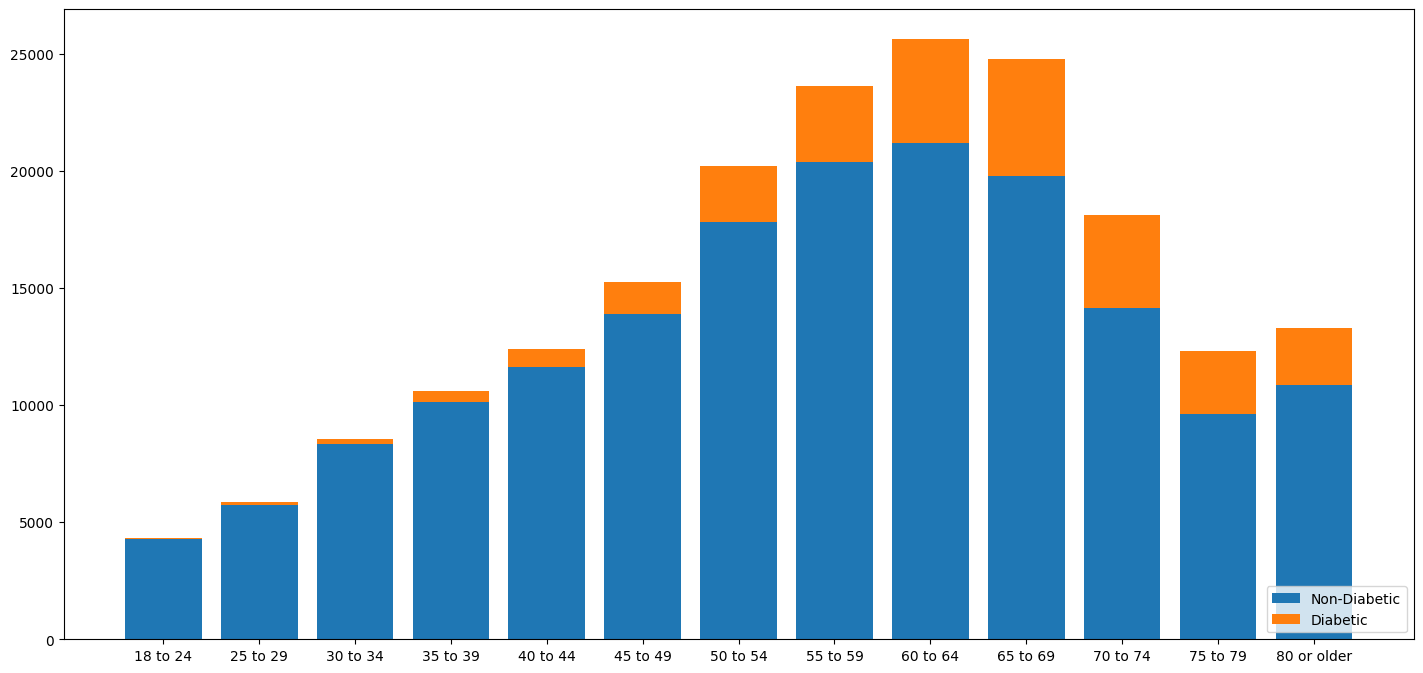

In [63]:
age_figer=plt.figure(figsize=(15,7),dpi=100)
age_axes=age_figer.add_axes([0.1,0.1,0.9,0.9])

age_axes.bar(age_diabetes_distribution .index,age_diabetes_distribution ["Non-Diabetic"],label="Non-Diabetic")
age_axes.bar(age_diabetes_distribution .index,age_diabetes_distribution ["Diabetic"],label="Diabetic",bottom=age_diabetes_distribution ["Non-Diabetic"])
plt.legend(loc="lower right")


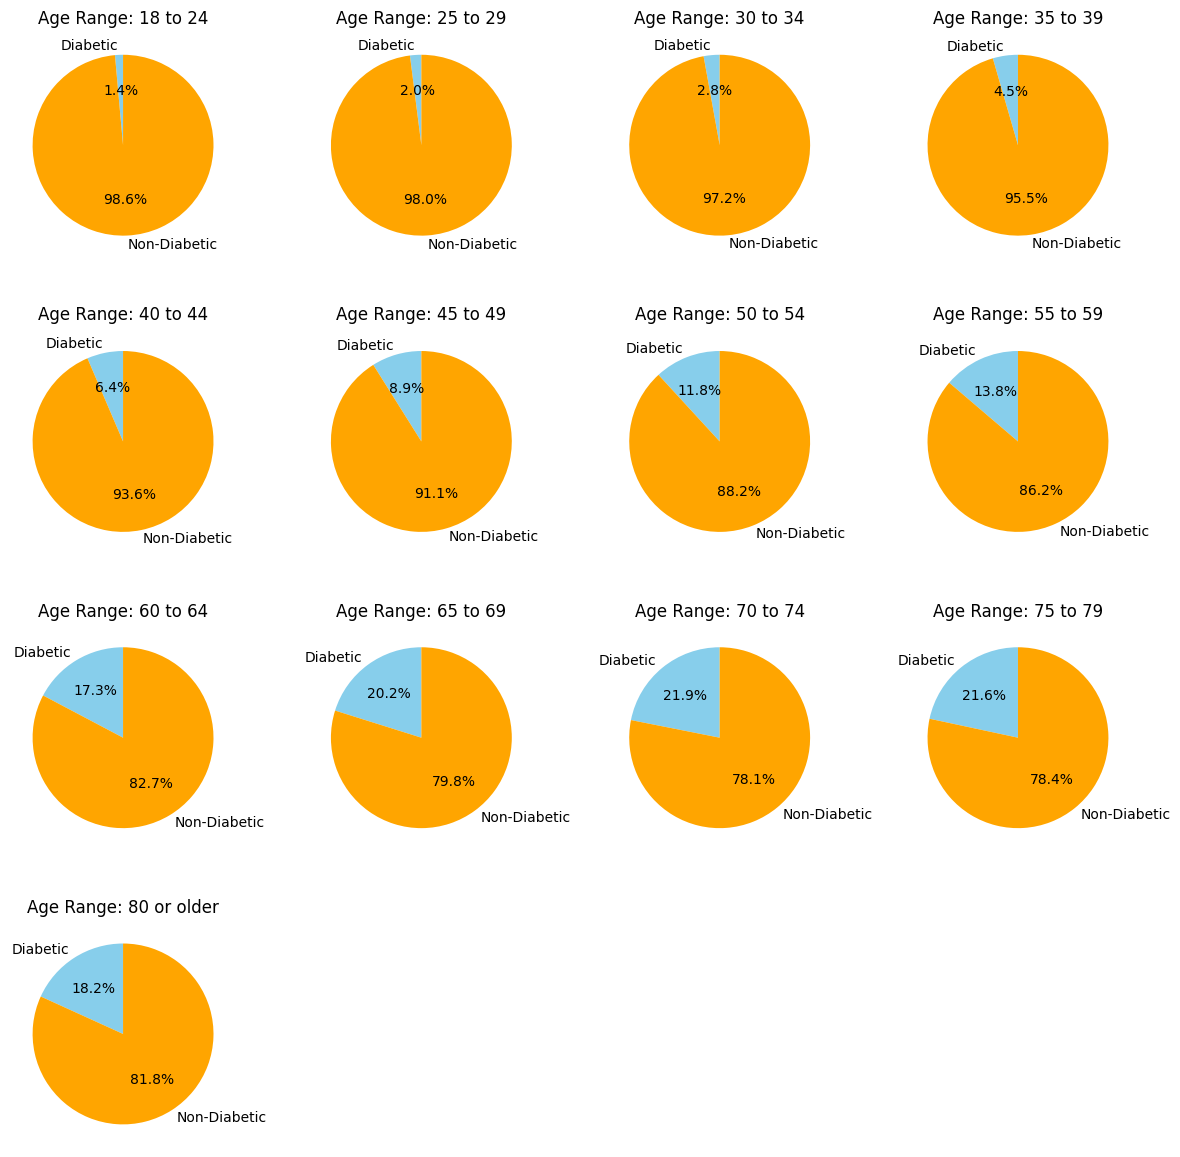

In [64]:
import math

age_diabetes_percentage = age_diabetes_distribution.div(age_diabetes_distribution.sum(axis=1), axis=0) * 100

num_age_ranges = len(age_diabetes_percentage)

rows = math.ceil(num_age_ranges / 4)
fig, axes = plt.subplots(rows, 4, figsize=(12, rows * 3), dpi=100)

axes = axes.flatten()

for i, age_range in enumerate(age_diabetes_percentage.index):
    data = age_diabetes_percentage.loc[age_range]
    axes[i].pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
    axes[i].set_title(f'Age Range: {age_range}')
    
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Visualizing Education Data

In [65]:
diabetes_train_dataframe["Education"].describe()

count     194825
unique         6
top            6
freq       82604
Name: Education, dtype: object

In [66]:
education_count=diabetes_train_dataframe["Education"].value_counts().sort_values()
education_count

Education
Never Attended School      135
Elementary                3094
High School               7291
Some College Degree      48146
Advanced Degree          53555
6                        82604
Name: count, dtype: int64

<BarContainer object of 6 artists>

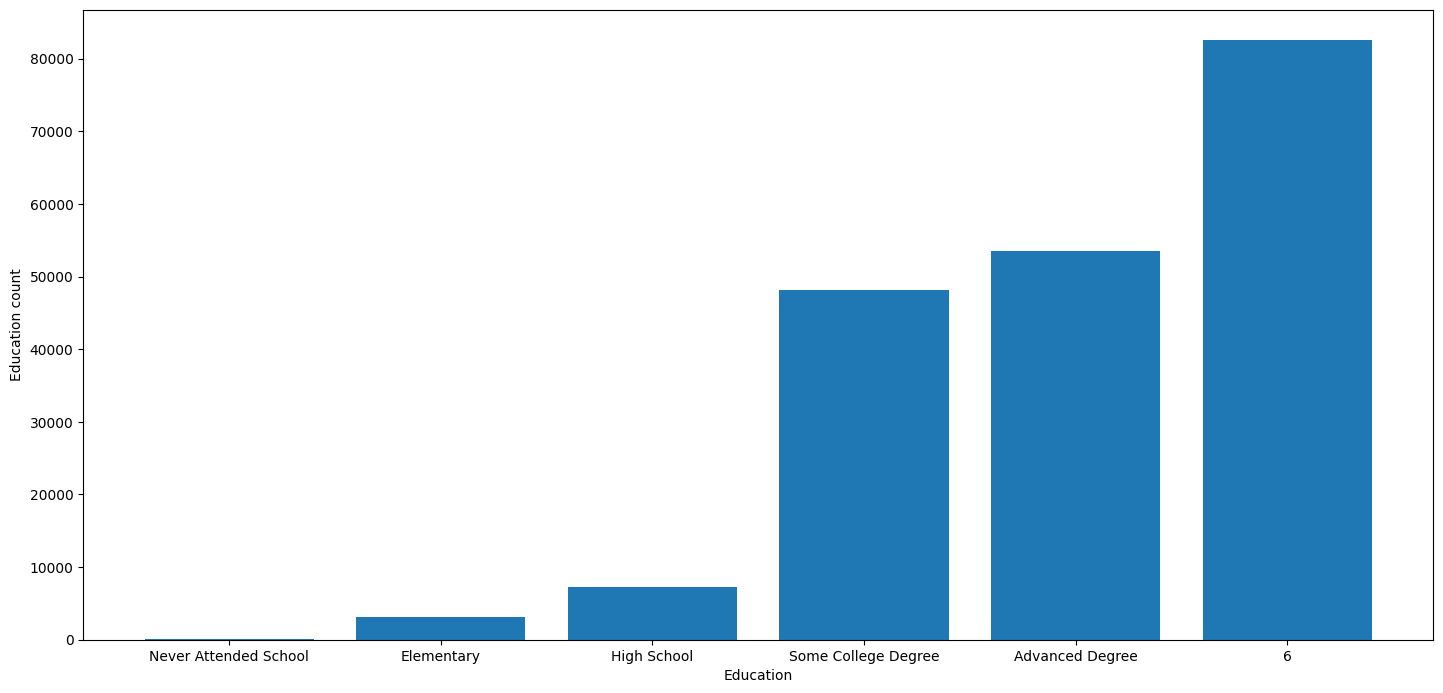

In [67]:
education_figer=plt.figure(figsize=(15,7),dpi=100)
education_axes=education_figer.add_axes([0.1,0.1,0.9,0.9])

education_axes.set_xlabel('Education')
education_axes.set_ylabel('Education count')

education_axes.bar(education_count.index,education_count.values)

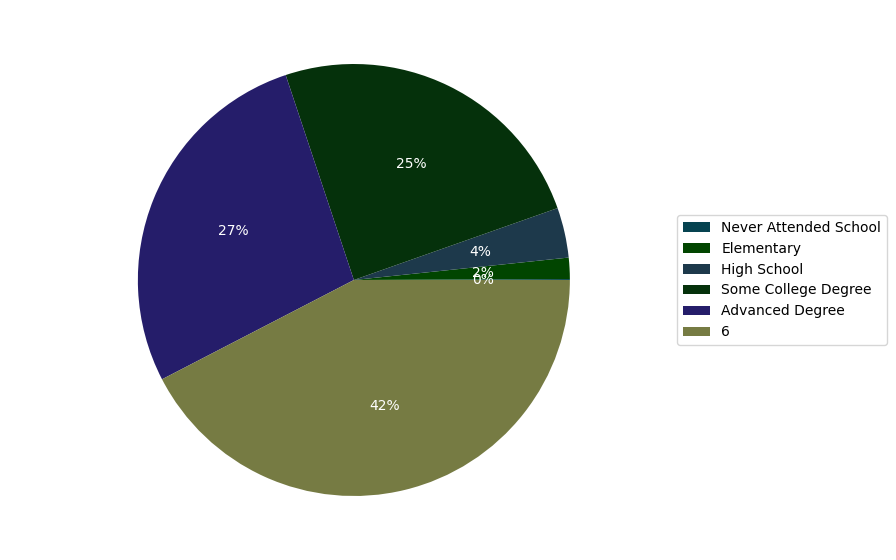

In [68]:
import random

education_figer=plt.figure(figsize=(20,6),dpi=100)
education_axes=education_figer.add_axes([0.1,0.1,0.9,0.9])

colors=[]
for i in range(education_count.size):
    rgb=(random.uniform(0,0.5),random.uniform(0,0.5),random.uniform(0,0.5))
    colors.append(rgb)


wedges, texts, autotexts=education_axes.pie(education_count.values,labels=education_count.index,
                                      colors=colors,autopct="%1.0f%%",textprops=dict(color="w"))
plt.legend(wedges,education_count.index,loc="right",bbox_to_anchor=(1,0,0.5,1))

plt.show()

In [69]:
education_diabetes_distribution =(
    diabetes_train_dataframe.groupby(by=["Education","Diabetes_binary"])["Diabetes_binary"]
    .count()
    .unstack(fill_value=0)
)

education_diabetes_distribution

Diabetes_binary,Diabetic,Non-Diabetic
Education,,
6,7958,74646
Advanced Degree,7955,45600
Elementary,908,2186
High School,1765,5526
Never Attended School,36,99
Some College Degree,8524,39622


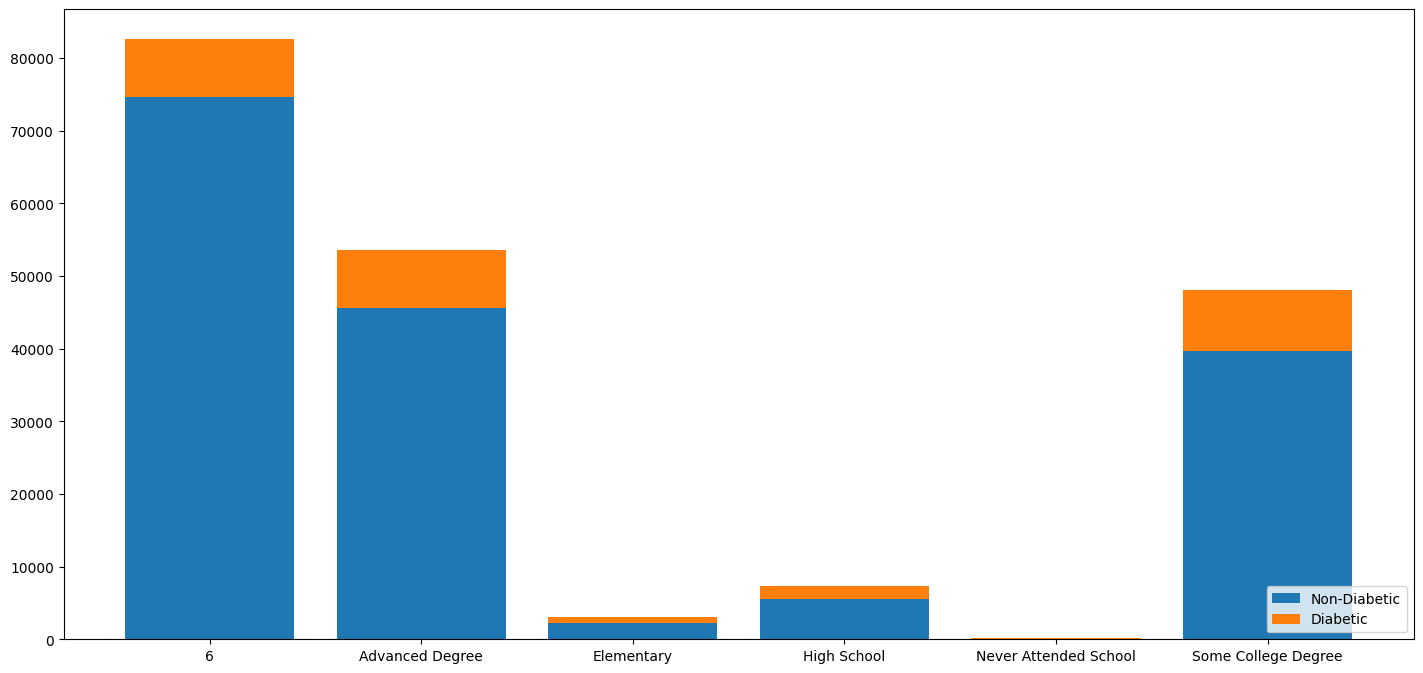

In [70]:
education_figer=plt.figure(figsize=(15,7),dpi=100)
education_axes=education_figer.add_axes([0.1,0.1,0.9,0.9])

education_axes.bar(education_diabetes_distribution .index,education_diabetes_distribution ["Non-Diabetic"],label="Non-Diabetic")
education_axes.bar(education_diabetes_distribution .index,education_diabetes_distribution ["Diabetic"],label="Diabetic",bottom=education_diabetes_distribution ["Non-Diabetic"])
plt.legend(loc="lower right")

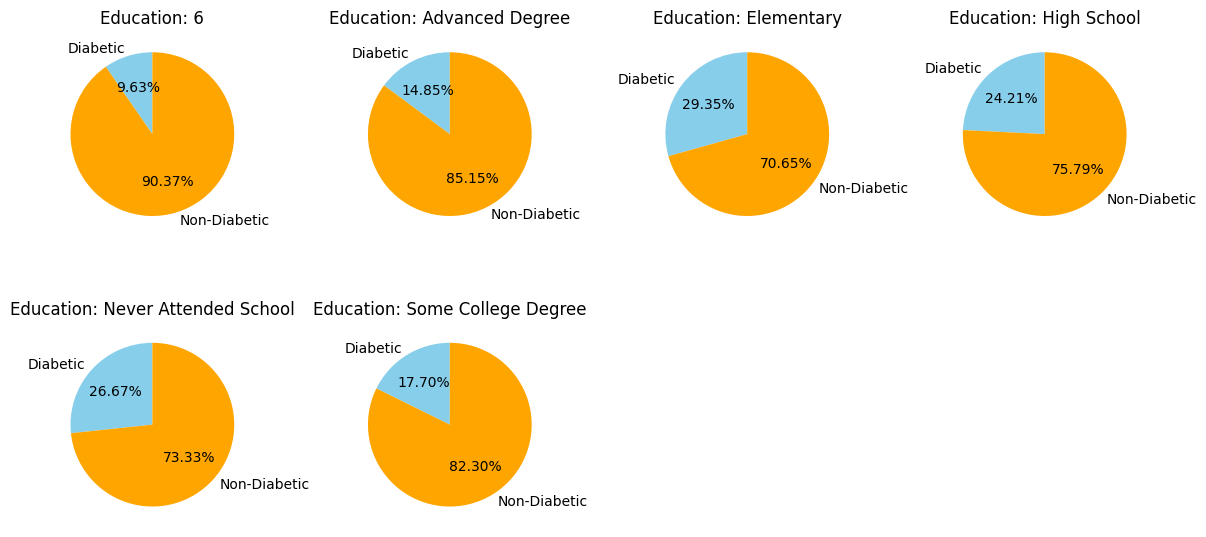

In [71]:
import math

education_diabetes_percentage = education_diabetes_distribution.div(education_diabetes_distribution.sum(axis=1), axis=0) * 100

num_education_ranges = len(education_diabetes_percentage)

rows = math.ceil(num_education_ranges / 4)
fig, axes = plt.subplots(rows, 4, figsize=(12, rows * 3), dpi=100)

axes = axes.flatten()

for i, education_range in enumerate(education_diabetes_percentage.index):
    data = education_diabetes_percentage.loc[education_range]
    axes[i].pie(data, labels=data.index, autopct='%0.2f%%', startangle=90, colors=['skyblue', 'orange'])
    axes[i].set_title(f'Education: {education_range}')
    
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## visualizing General Health data 

selecting the colors

In [72]:
colors = ['#66b3ff', '#ff6666']

### 1.histograms

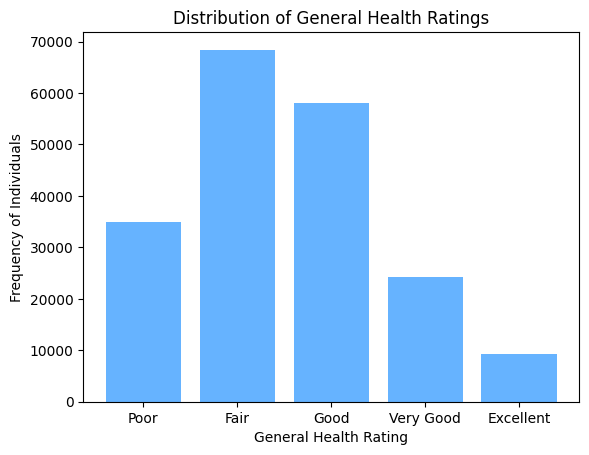

In [73]:
# Define the order of bins
ratings = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']

# Calculate frequency and reindex
freq = diabetes_train_dataframe["GenHlth"].value_counts().reindex(ratings, fill_value=0)

# Use bar chart instead of histogram
plt.bar(freq.index, freq.values, color=colors[0])
plt.ylabel("Frequency of Individuals")
plt.xlabel("General Health Rating")
plt.title("Distribution of General Health Ratings")

plt.show()


### 2.bar chart

a bar chart that shows each general health rating with its number of occurances

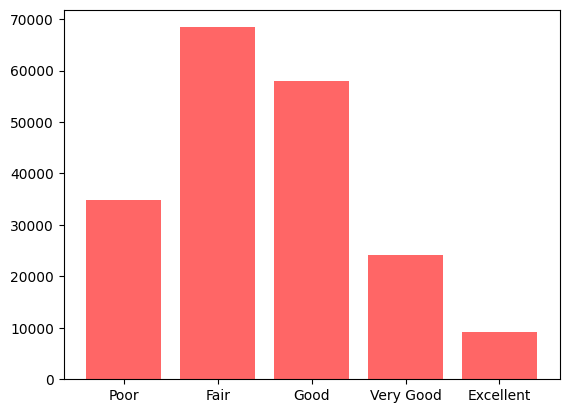

In [74]:
plt.bar(freq.index, freq.values, color=colors[1])
plt.show()

a bar chart that shows each rating with its occurances, splitted to *'Diabetic'* and *'Non-Diabetic'*

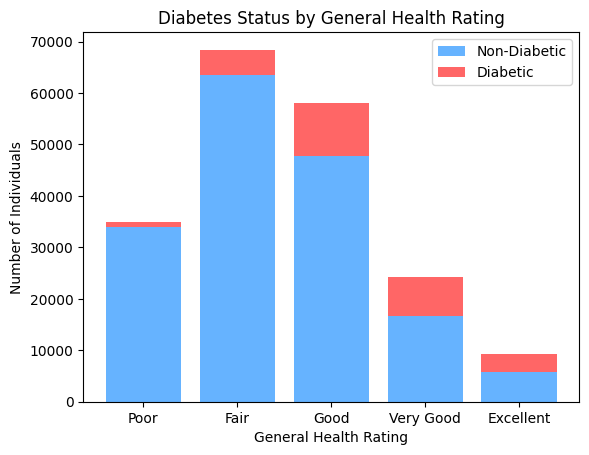

GenHlth    Diabetes_binary
Excellent  Diabetic            3510
           Non-Diabetic        5755
Fair       Diabetic            4922
           Non-Diabetic       63500
Good       Diabetic           10288
           Non-Diabetic       47764
Poor       Diabetic             868
           Non-Diabetic       33995
Very Good  Diabetic            7558
           Non-Diabetic       16665
dtype: int64

In [75]:
group_sizes = diabetes_train_dataframe.groupby(["GenHlth", "Diabetes_binary"]).size()

gen_hlth_diabetic= [int(group_sizes[i]["Diabetic"]) for i in freq.index]
gen_hlth_non_diabetic= [int(group_sizes[i]["Non-Diabetic"]) for i in freq.index]

plt.bar(freq.index, gen_hlth_non_diabetic, label='Non-Diabetic', color=colors[0])
plt.bar(freq.index, gen_hlth_diabetic, bottom=gen_hlth_non_diabetic, label='Diabetic', color=colors[1])

#adding labels and title
plt.xlabel('General Health Rating')
plt.ylabel('Number of Individuals')
plt.title('Diabetes Status by General Health Rating')
plt.legend() #to show labels in the upper right corner
plt.show()
group_sizes

### 3.pie chart
each pie chart visualizes the proportion of diabetic and non-diabetic individuals in each health category, with the percentage distribution shown on the chart.

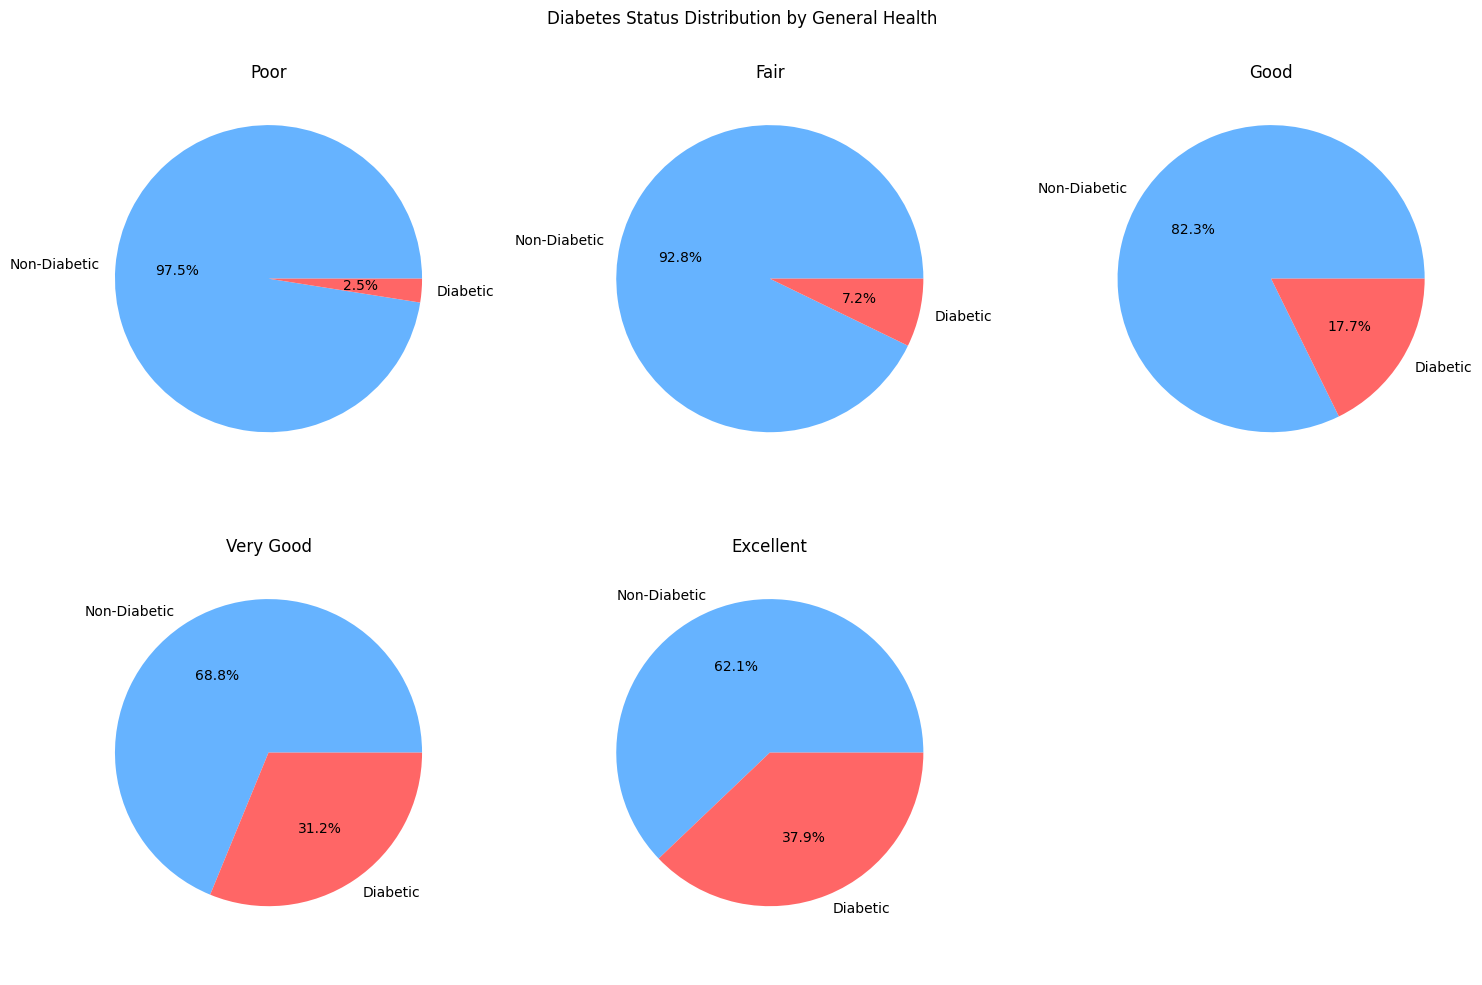

In [76]:
# Assuming you have the necessary data
num_plots = 5  # Number of pie charts to display
rows = 2  # Two rows
cols = 3  # Three columns

fig, axes = plt.subplots(rows, cols, figsize=(15, 10))  # Adjust figsize as needed

# Flatten axes array to easily index it
axes = axes.flatten()

for i, rating in enumerate(ratings):
    ax = axes[i]  # Select the subplot
    ax.pie([int(group_sizes[rating]["Non-Diabetic"]), int(group_sizes[rating]["Diabetic"])], 
           labels=["Non-Diabetic", "Diabetic"], autopct='%0.1f%%', colors=colors)
    ax.set_title(rating)  # Use the updated categories

# Hide empty subplots (if any)
for i in range(num_plots, len(axes)):
    axes[i].axis('off')

fig.suptitle("Diabetes Status Distribution by General Health")
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

### Visualizing BMI Data

In [77]:
bmi_count=diabetes_train_dataframe["BMI"].value_counts().sort_index()

bmi_count

BMI
12.0      4
13.0     17
14.0     30
15.0     96
16.0    266
       ... 
91.0      1
92.0     25
95.0     11
96.0      1
98.0      4
Name: count, Length: 83, dtype: int64

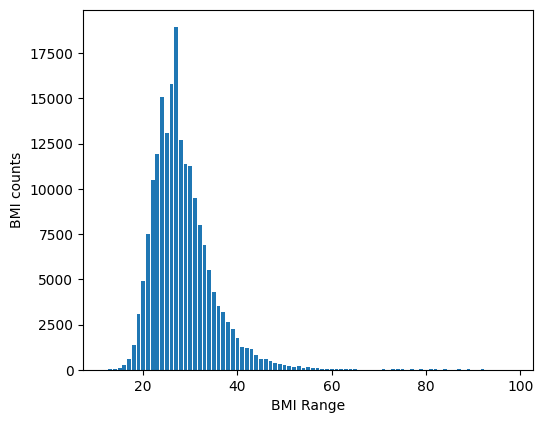

In [78]:
bmi_figer=plt.figure(figsize=(5,4),dpi=100)
bmi_axes=bmi_figer.add_axes([0.1,0.1,0.9,0.9])

bmi_axes.set_xlabel('BMI Range')
bmi_axes.set_ylabel('BMI counts')

bmi_axes.bar(bmi_count.index,bmi_count.values)

plt.show()

### Visualizing Veggies data
if the individual consumes veggies at least once per day 

In [79]:
diabetes_train_dataframe["Veggies"].value_counts()

Veggies
1    158238
0     36587
Name: count, dtype: int64

C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_13484\215707290.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  nums = [grouped_by_veggies[0], grouped_by_veggies[1], grouped_by_veggies[2], grouped_by_veggies[3]]


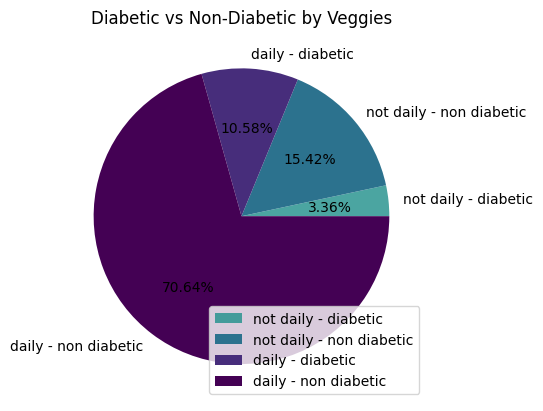

In [80]:
grouped_by_veggies = diabetes_train_dataframe.groupby(["Veggies", "Diabetes_binary"]).size()
labels = ["not daily - diabetic", "not daily - non diabetic", "daily - diabetic", "daily - non diabetic"]
nums = [grouped_by_veggies[0], grouped_by_veggies[1], grouped_by_veggies[2], grouped_by_veggies[3]]
plt.pie(nums, labels=labels, autopct='%0.2f%%', colors=["#21908CCF", "#2C728EFF", "#472D7BFF", "#440154FF"])
plt.legend()
plt.title("Diabetic vs Non-Diabetic by Veggies")
plt.show()

### Visualizing Fruits data
if the individual consumes fruit at least once per day 

In [81]:
diabetes_train_dataframe["Fruits"].value_counts()

Fruits
1    123553
0     71272
Name: count, dtype: int64

C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_13484\4087238112.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  nums = [grouped_by_fruits[0], grouped_by_fruits[1], grouped_by_fruits[2], grouped_by_fruits[3]]


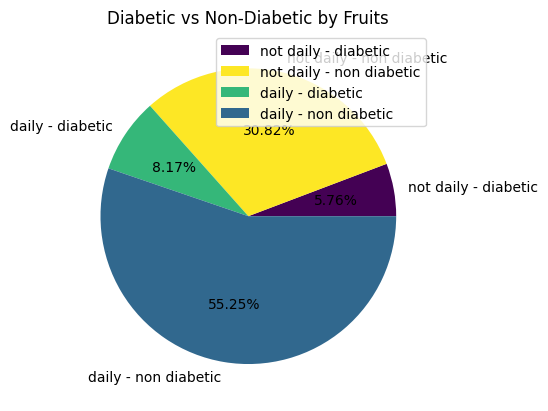

In [82]:
grouped_by_fruits = diabetes_train_dataframe.groupby(["Fruits", "Diabetes_binary"]).size().sort_index()
nums = [grouped_by_fruits[0], grouped_by_fruits[1], grouped_by_fruits[2], grouped_by_fruits[3]]
plt.pie(nums, labels = labels, autopct='%0.2f%%', colors=["#440154FF", "#FDE725FF", "#35B779FF", "#31688EFF"])
plt.legend()
plt.title("Diabetic vs Non-Diabetic by Fruits")
plt.show()


# ***Handling non-numeric Attributes***

## ordinal encoding : GenHlth
encoding the values of **GenHlth**, 
*'poor : 1, fair : 2, good : 3, very good : 4, Excellent : 5'*

In [83]:
from sklearn.preprocessing import OrdinalEncoder

# poor : 1, fair : 2, good : 3, very good : 4, Excellent : 5
categories_order = [['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']]
def general_health_ordinal_encoding(df) :
    ordinal_encoder = OrdinalEncoder(categories=categories_order)
    #fit GenHlth
    df[["GenHlth"]] = ordinal_encoder.fit_transform(df[["GenHlth"]])
    df["GenHlth"] = df["GenHlth"] + 1
    
    
general_health_ordinal_encoding(diabetes_train_dataframe)
general_health_ordinal_encoding(diabetes_test_dataframe)

diabetes_train_dataframe["GenHlth"].value_counts()

GenHlth
2.0    68422
3.0    58052
1.0    34863
4.0    24223
5.0     9265
Name: count, dtype: int64

## Convert the age range to the average age

In [84]:
# Function get age_range like string the convert it to number 
def get_age_avg(age_range_string):
    age_range=age_range_string.split(" ")
    age_range.remove(age_range[1])
    if age_range[-1]=="older":
        age_range[-1]=100
    for idx in range(2):
        age_range[idx]=int(age_range[idx])
    
    return sum(age_range)/len(age_range)

In [85]:
diabetes_train_dataframe["Age"]=diabetes_train_dataframe["Age"].apply(get_age_avg)
diabetes_test_dataframe["Age"]=diabetes_test_dataframe["Age"].apply(get_age_avg)

diabetes_train_dataframe

,ID,BMI,PhysHlth,Age,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,...,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,DiffWalk,Sex,Education,Income,Diabetes_binary
0,114414,29.0,0.0,67.0,0,1,1,0,0,0,...,0,1,1,1.0,0,0,0,6,7,Non-Diabetic
1,168896,32.0,0.0,90.0,1,1,1,0,0,0,...,0,1,0,1.0,0,0,0,Some College Degree,4,Non-Diabetic
2,68354,25.0,5.0,67.0,1,0,1,1,0,0,...,0,1,0,2.0,0,0,1,6,2,Non-Diabetic
3,121194,24.0,0.0,90.0,1,0,1,0,0,0,...,0,1,0,4.0,0,1,0,Advanced Degree,5,Non-Diabetic
4,141150,31.0,0.0,27.0,0,0,1,0,0,1,...,0,1,0,4.0,5,0,0,6,6,Diabetic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194820,43401,28.0,28.0,52.0,1,1,1,0,0,0,...,0,1,0,4.0,15,1,1,Advanced Degree,6,Diabetic
194821,233048,25.0,0.0,62.0,0,0,1,1,0,0,...,0,1,1,2.0,0,0,0,Advanced Degree,7,Non-Diabetic
194822,1241,33.0,1.0,67.0,0,1,1,1,0,1,...,0,1,0,2.0,2,0,0,6,7,Non-Diabetic
194823,248165,33.0,0.0,62.0,0,0,1,0,0,0,...,0,1,0,2.0,1,1,0,6,7,Non-Diabetic


## Converting Columns Types

### converting labels **"Diabetes_binary"** into **int**
if **'Non-Diabetic'** -> **0**, if **'Diabetic'** -> **1**

In [86]:
diabetes_train_dataframe["Diabetes_binary"] = diabetes_train_dataframe["Diabetes_binary"].apply(lambda x: 0 if x == "Non-Diabetic" else 1)
diabetes_test_dataframe["Diabetes_binary"] = diabetes_test_dataframe["Diabetes_binary"].apply(lambda x: 0 if x == "Non-Diabetic" else 1)

### converting the types of other columns into **int**

In [87]:
columns_names=["Sex","HighBP","CholCheck","Smoker",
              "HeartDiseaseorAttack","NoDocbcCost","MentHlth",
              "DiffWalk","Income","PhysActivity","Fruits",
              "Veggies","HvyAlcoholConsump","AnyHealthcare",
              "NoDocbcCost","HighChol","Stroke"
              ]
for name in columns_names:
    diabetes_train_dataframe[name]=diabetes_train_dataframe[name].astype(int)
    diabetes_test_dataframe[name] = diabetes_test_dataframe[name].astype(int)

diabetes_train_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194825 entries, 0 to 194824
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    194825 non-null  int64  
 1   BMI                   194825 non-null  float32
 2   PhysHlth              194825 non-null  float32
 3   Age                   194825 non-null  float64
 4   HighBP                194825 non-null  int64  
 5   HighChol              194825 non-null  int64  
 6   CholCheck             194825 non-null  int64  
 7   Smoker                194825 non-null  int64  
 8   Stroke                194825 non-null  int64  
 9   HeartDiseaseorAttack  194825 non-null  int64  
 10  PhysActivity          194825 non-null  int64  
 11  Fruits                194825 non-null  int64  
 12  Veggies               194825 non-null  int64  
 13  HvyAlcoholConsump     194825 non-null  int64  
 14  AnyHealthcare         194825 non-null  int64  
 15  

### Drop ID,Income,and Education Columns

In [88]:
diabetes_train_dataframe.drop(columns=["ID","Income","Education","GenHlth","CholCheck","NoDocbcCost","AnyHealthcare"],inplace=True)
diabetes_test_dataframe.drop(columns=["ID","Income","Education","GenHlth","CholCheck","NoDocbcCost","AnyHealthcare"],inplace=True)

diabetes_train_dataframe

,BMI,PhysHlth,Age,HighBP,HighChol,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,DiffWalk,Sex,Diabetes_binary
0,29.0,0.0,67.0,0,1,0,0,0,1,0,1,0,0,0,0,0
1,32.0,0.0,90.0,1,1,0,0,0,0,1,1,0,0,0,0,0
2,25.0,5.0,67.0,1,0,1,0,0,1,1,1,0,0,0,1,0
3,24.0,0.0,90.0,1,0,0,0,0,0,0,1,0,0,1,0,0
4,31.0,0.0,27.0,0,0,0,0,1,1,1,1,0,5,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194820,28.0,28.0,52.0,1,1,0,0,0,1,0,0,0,15,1,1,1
194821,25.0,0.0,62.0,0,0,1,0,0,1,1,1,0,0,0,0,0
194822,33.0,1.0,67.0,0,1,1,0,1,1,0,1,0,2,0,0,0
194823,33.0,0.0,62.0,0,0,0,0,0,1,0,1,0,1,1,0,0


### Correlation Coefficient

In [89]:
corr_matrix = diabetes_train_dataframe.select_dtypes(include=[np.number]).corr()

corr_matrix

,BMI,PhysHlth,Age,HighBP,HighChol,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,DiffWalk,Sex,Diabetes_binary
BMI,1.000000,0.121747,-0.046082,0.213305,0.107133,0.014079,0.018858,0.052302,-0.147855,-0.086483,-0.062529,-0.047601,0.085167,0.197960,0.041644,0.216507
PhysHlth,0.121747,1.000000,0.096717,0.161561,0.121419,0.116273,0.149757,0.181195,-0.216962,-0.043862,-0.064913,-0.026868,0.356748,0.477421,-0.042329,0.171136
Age,-0.046082,0.096717,1.000000,0.338022,0.261969,0.113223,0.128975,0.222955,-0.093872,0.070288,-0.007971,-0.034183,-0.092030,0.206093,-0.029467,0.169806
HighBP,0.213305,0.161561,0.338022,1.000000,0.298781,0.096549,0.129339,0.208640,-0.126449,-0.040193,-0.061015,-0.002925,0.057633,0.223845,0.050657,0.262714
HighChol,0.107133,0.121419,0.261969,0.298781,1.000000,0.089325,0.091771,0.178815,-0.079693,-0.038097,-0.038308,-0.011087,0.061071,0.143483,0.031228,0.200867
Smoker,0.014079,0.116273,0.113223,0.096549,0.089325,1.000000,0.061402,0.116124,-0.089018,-0.077489,-0.032046,0.102757,0.092149,0.121502,0.093728,0.059186
Stroke,0.018858,0.149757,0.128975,0.129339,0.091771,0.061402,1.000000,0.201653,-0.067157,-0.013408,-0.039944,-0.017008,0.070288,0.176217,0.001198,0.104027
HeartDiseaseorAttack,0.052302,0.181195,0.222955,0.208640,0.178815,0.116124,0.201653,1.000000,-0.088195,-0.020376,-0.039070,-0.027299,0.064640,0.211127,0.085112,0.177428
PhysActivity,-0.147855,-0.216962,-0.093872,-0.126449,-0.079693,-0.089018,-0.067157,-0.088195,1.000000,0.143115,0.154248,0.010369,-0.125627,-0.252121,0.032653,-0.118839
Fruits,-0.086483,-0.043862,0.070288,-0.040193,-0.038097,-0.077489,-0.013408,-0.020376,0.143115,1.000000,0.254811,-0.033376,-0.064375,-0.047236,-0.090805,-0.039921


In [90]:
corr_matrix["Diabetes_binary"].sort_values(ascending=False)

Diabetes_binary         1.000000
HighBP                  0.262714
BMI                     0.216507
DiffWalk                0.216311
HighChol                0.200867
HeartDiseaseorAttack    0.177428
PhysHlth                0.171136
Age                     0.169806
Stroke                  0.104027
MentHlth                0.070114
Smoker                  0.059186
Sex                     0.028988
Fruits                 -0.039921
Veggies                -0.054656
HvyAlcoholConsump      -0.057601
PhysActivity           -0.118839
Name: Diabetes_binary, dtype: float64

### Models

In [91]:
train_data=diabetes_train_dataframe
test_data=diabetes_test_dataframe[0:5000]
train_label=train_data["Diabetes_binary"]
test_label=test_data["Diabetes_binary"]
train_data=train_data.drop("Diabetes_binary",axis=1)
test_data=test_data.drop("Diabetes_binary",axis=1)

In [92]:
from sklearn.preprocessing import StandardScaler

stander_scaler = StandardScaler()

train_data[["PhysHlth","BMI","Age"]]=stander_scaler.fit_transform(train_data[["PhysHlth","BMI","Age"]])

test_data[["PhysHlth","BMI","Age"]]=stander_scaler.transform(test_data[["PhysHlth","BMI","Age"]])

In [93]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(random_state=42,max_iter=200)
model=logistic_regression.fit(train_data,train_label)

prediction=logistic_regression.predict(test_data)
model.score(test_data,test_label)

0.8696

In [94]:
test={
    "prediction":prediction,
    "labels":test_label
}

df=pd.DataFrame(test)
df.value_counts("prediction"),df.value_counts("labels")

(prediction
 0    4847
 1     153
 Name: count, dtype: int64,
 labels
 0    4313
 1     687
 Name: count, dtype: int64)

In [95]:
diabetes_train_dataframe.columns

Index(['BMI', 'PhysHlth', 'Age', 'HighBP', 'HighChol', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'MentHlth', 'DiffWalk', 'Sex', 'Diabetes_binary'],
      dtype='object')

In [97]:
diabetes_train_dataframe["Diabetes_binary"].value_counts()

Diabetes_binary
0    167679
1     27146
Name: count, dtype: int64

In [98]:
from sklearn.metrics import f1_score,precision_score
f1_score(test_label,prediction)

np.float64(0.22380952380952382)

In [99]:
precision_score(test_label,prediction)

np.float64(0.6143790849673203)